In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
#empty list for holding the latitude & longitude combinations
lat_lngs = []

#emply list to hold city names
cities = []
# range of latitudes and longitudes 
lat_range = (-90,90)
lng_range = (-180,180)

#set of ranom lat and lng comibnations
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    
    # if the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [169]:
url ="http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

#query_url = f"{url}appid={weather_api_key}&q={cities}"
#response = requests.get(query_url).json()
#response

# define an empty list to fetch the weather data for each city
city_data = []


#print the logger
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters 

record_count = 1 
set_count = 1

# loop thru all the cities in our list to fetch weather data 

for i, city, in enumerate(cities):
    
    
    #group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >=50):
        
        set_count += 1 
        record_count = 0 
    
#create endpoint URL with each city 

            
    print("Processing Record %s of set %s| %s" % (record_count,set_count,city))
        
    record_count += 1 
    # run an API request for each of the citites
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    responseJSON = requests.get(city_url).json()
    #print(city_url)
   # responseJSON = response.json()
    
        
    try:
        
          
        city_weather = responseJSON['main']['temp']
        city_lat = responseJSON['coord']['lat']
        city_lng = responseJSON['coord']['lon']
        city_max_temp = responseJSON['main']['temp_max']
        city_humidity = responseJSON['main']['humidity']
        city_clouds = responseJSON['clouds']['all']
        city_wind = responseJSON['wind']['speed']
        city_country = responseJSON['sys']['country']
        city_date = responseJSON['dt']
        
        
        city_data.append({"City": city,
                          
                          
                      
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
   
                          
    except:
                        
        print("City not found. Skipping...")
        pass
                          
                          

  

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
responseJSON     

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1| avarua
Processing Record 2 of set 1| vardo
Processing Record 3 of set 1| atsipopoulon
Processing Record 4 of set 1| rikitea
Processing Record 5 of set 1| saint anthony
Processing Record 6 of set 1| port alfred
Processing Record 7 of set 1| turan
Processing Record 8 of set 1| lyndon
Processing Record 9 of set 1| taolanaro
City not found. Skipping...
Processing Record 10 of set 1| lima
Processing Record 11 of set 1| marawi
Processing Record 12 of set 1| caibarien
Processing Record 13 of set 1| lebu
Processing Record 14 of set 1| hobart
Processing Record 15 of set 1| saint-philippe
Processing Record 16 of set 1| laguna
Processing Record 17 of set 1| mataura
Processing Record 18 of set 1| geraldton
Processing Record 19 of set 1| touros
Processing Record 20 of set 1| fort nelson
Processing Record 21 of set 1| illoqqortoormiut
City not found. Skipping...
Processing Record 22 of set 1| louisbourg
City not 

Processing Record 41 of set 4| manokwari
Processing Record 42 of set 4| oranjemund
Processing Record 43 of set 4| ormara
Processing Record 44 of set 4| saleaula
City not found. Skipping...
Processing Record 45 of set 4| castro
Processing Record 46 of set 4| vao
Processing Record 47 of set 4| tuatapere
Processing Record 48 of set 4| quatre cocos
Processing Record 49 of set 4| calvinia
Processing Record 0 of set 5| pangkalanbuun
Processing Record 1 of set 5| port-gentil
Processing Record 2 of set 5| narrabri
Processing Record 3 of set 5| sola
Processing Record 4 of set 5| sawakin
Processing Record 5 of set 5| severo-kurilsk
Processing Record 6 of set 5| sept-iles
Processing Record 7 of set 5| kozulka
Processing Record 8 of set 5| bethel
Processing Record 9 of set 5| shache
Processing Record 10 of set 5| swellendam
Processing Record 11 of set 5| nantucket
Processing Record 12 of set 5| nizhneyansk
City not found. Skipping...
Processing Record 13 of set 5| shimoda
Processing Record 14 of s

City not found. Skipping...
Processing Record 38 of set 8| port alberni
Processing Record 39 of set 8| suraabad
Processing Record 40 of set 8| kyshtovka
Processing Record 41 of set 8| miranda
Processing Record 42 of set 8| thinadhoo
Processing Record 43 of set 8| wolgast
Processing Record 44 of set 8| xadani
City not found. Skipping...
Processing Record 45 of set 8| vila velha
Processing Record 46 of set 8| mezen
Processing Record 47 of set 8| dingle
Processing Record 48 of set 8| bilibino
Processing Record 49 of set 8| oktyabrskoye
Processing Record 0 of set 9| mufumbwe
Processing Record 1 of set 9| saint-pierre
Processing Record 2 of set 9| port moresby
Processing Record 3 of set 9| coihaique
Processing Record 4 of set 9| angoram
Processing Record 5 of set 9| general pico
Processing Record 6 of set 9| businga
Processing Record 7 of set 9| gamba
Processing Record 8 of set 9| bharatpur
Processing Record 9 of set 9| mul
Processing Record 10 of set 9| faanui
Processing Record 11 of set 9

City not found. Skipping...
Processing Record 30 of set 12| ulaangom
Processing Record 31 of set 12| sisimiut
Processing Record 32 of set 12| singaraja
Processing Record 33 of set 12| berezovo
Processing Record 34 of set 12| lodwar
Processing Record 35 of set 12| sumbawa
City not found. Skipping...
Processing Record 36 of set 12| linares
Processing Record 37 of set 12| karauzyak
City not found. Skipping...
Processing Record 38 of set 12| salamanca
Processing Record 39 of set 12| zverinogolovskoye
Processing Record 40 of set 12| salta
Processing Record 41 of set 12| hays
Processing Record 42 of set 12| mogadishu
Processing Record 43 of set 12| baykit
Processing Record 44 of set 12| sao filipe
Processing Record 45 of set 12| maroantsetra
Processing Record 46 of set 12| bagotville
Processing Record 47 of set 12| suihua
Processing Record 48 of set 12| doba
Processing Record 49 of set 12| mayumba
Processing Record 0 of set 13| hambantota
Processing Record 1 of set 13| bilma
Processing Recor

{'coord': {'lon': -75.4557, 'lat': 43.2128},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 0.16,
  'feels_like': -6.21,
  'temp_min': -1.26,
  'temp_max': 0.46,
  'pressure': 1009,
  'humidity': 82},
 'visibility': 2816,
 'wind': {'speed': 8.23, 'deg': 110, 'gust': 14.4},
 'snow': {'1h': 0.65},
 'clouds': {'all': 100},
 'dt': 1677894668,
 'sys': {'type': 1,
  'id': 5681,
  'country': 'US',
  'sunrise': 1677843319,
  'sunset': 1677883958},
 'timezone': -18000,
 'id': 5134295,
 'name': 'Rome',
 'cod': 200}

In [171]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.json_normalize(city_data)
city_data_df.head()
# Show Record Count

city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [172]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,30.03,66,75,1.54,CK,1677894550
1,vardo,70.3705,31.1107,0.99,86,100,10.80,NO,1677894551
2,atsipopoulon,35.3500,24.4333,11.71,77,32,2.35,GR,1677894551
3,rikitea,-23.1203,-134.9692,27.10,71,43,4.99,PF,1677894551
4,saint anthony,45.0205,-93.2180,2.96,71,0,2.57,US,1677894552


In [173]:
#export the city_data to a csv

city_data_df.to_csv("output_data/cities.csv",index_label="City_ID")

city_data_df = pd.read_csv("output_data/cities.csv",index_col="City_ID")
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,30.03,66,75,1.54,CK,1677894550
1,vardo,70.3705,31.1107,0.99,86,100,10.80,NO,1677894551
2,atsipopoulon,35.3500,24.4333,11.71,77,32,2.35,GR,1677894551
3,rikitea,-23.1203,-134.9692,27.10,71,43,4.99,PF,1677894551
4,saint anthony,45.0205,-93.2180,2.96,71,0,2.57,US,1677894552


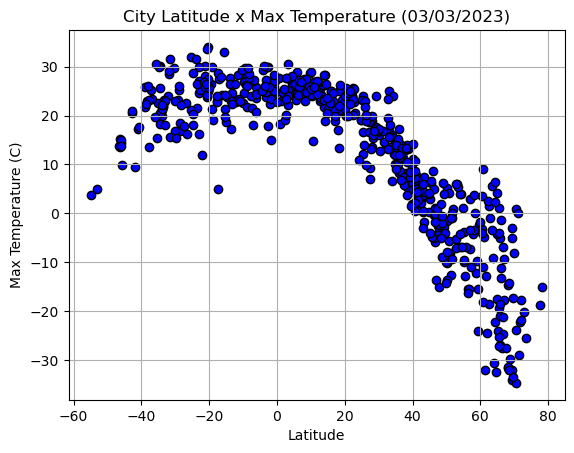

In [174]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

#xvalue = city_data_df.loc[city_data_df["Lat"]]
xvalue = city_data_df["Lat"]
temp_yvalue = city_data_df["Max Temp"]

today = pd.Timestamp("today").strftime("%m/%d/%Y")
#Timestamp('2015-10-14 00:00:00')
#today = to_datetime
plt.scatter(xvalue,temp_yvalue,edgecolors='k',color='b')
plt.grid()
plt.title(f"City Latitude x Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

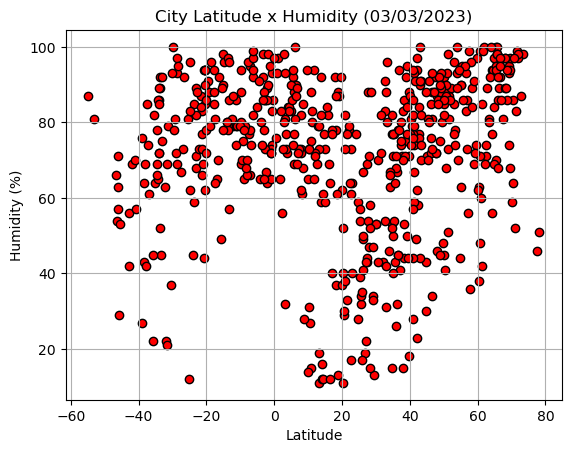

In [175]:
# Build the scatter plots for latitude vs. humidity
humidity_yvalue = city_data_df["Humidity"]
plt.scatter(xvalue,humidity_yvalue,edgecolors='k',color='r')
plt.grid()
plt.title(f"City Latitude x Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

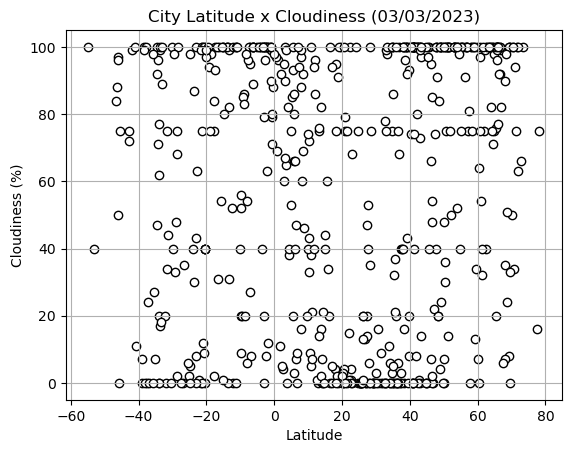

In [176]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudy_yvalue = city_data_df["Cloudiness"]
plt.scatter(xvalue,cloudy_yvalue,edgecolors='k',color='w')
plt.grid()
plt.title(f"City Latitude x Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

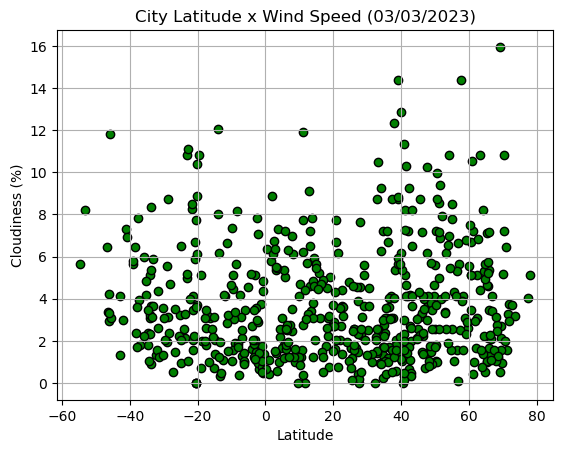

In [177]:
# Build the scatter plots for latitude vs. wind speed
windy_yvalue = city_data_df["Wind Speed"]
plt.scatter(xvalue,windy_yvalue,edgecolors='k',color='g')
plt.grid()
plt.title(f"City Latitude x Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [178]:

# Define a function to create Linear Regression plots
#(slope,intercept,rvalue,pvalue,sterr) = stats.linregress(city_data_df["Lat"],city_data_df["Max Temp"])


# !! Skipping per instruction given by Dr. A 


city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,30.03,66,75,1.54,CK,1677894550
1,vardo,70.3705,31.1107,0.99,86,100,10.80,NO,1677894551
2,atsipopoulon,35.3500,24.4333,11.71,77,32,2.35,GR,1677894551
3,rikitea,-23.1203,-134.9692,27.10,71,43,4.99,PF,1677894551
4,saint anthony,45.0205,-93.2180,2.96,71,0,2.57,US,1677894552


In [179]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE


northern_lats = (city_data_df.loc[city_data_df["Lat"] >=0])

northern_hemi_df = pd.DataFrame(northern_lats)




# Show Record Count
print(northern_hemi_df.count())

    

# Display sample data
northern_hemi_df.head()

City          402
Lat           402
Lng           402
Max Temp      402
Humidity      402
Cloudiness    402
Wind Speed    402
Country       402
Date          402
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vardo,70.3705,31.1107,0.99,86,100,10.80,NO,1677894551
2,atsipopoulon,35.3500,24.4333,11.71,77,32,2.35,GR,1677894551
4,saint anthony,45.0205,-93.2180,2.96,71,0,2.57,US,1677894552
6,turan,16.0678,108.2208,24.99,69,20,3.09,VN,1677894553
7,lyndon,38.2567,-85.6016,5.48,86,100,5.36,US,1677894553


In [187]:
southern_lats = (city_data_df.loc[city_data_df["Lat"]<=0])
southern_hemi_df = pd.DataFrame(southern_lats)
print(southern_hemi_df.count())
southern_hemi_df.head()

City          179
Lat           179
Lng           179
Max Temp      179
Humidity      179
Cloudiness    179
Wind Speed    179
Country       176
Date          179
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,30.03,66,75,1.54,CK,1677894550
3,rikitea,-23.1203,-134.9692,27.10,71,43,4.99,PF,1677894551
5,port alfred,-33.5906,26.8910,21.77,89,99,0.89,ZA,1677894552
8,lima,-12.0432,-77.0282,22.72,79,0,4.12,PE,1677894242
11,lebu,-37.6167,-73.6500,13.60,85,0,7.85,CL,1677894307


###  Temperature vs. Latitude Linear Regression Plot

In [188]:
# Linear regression on Northern Hemisphere

(temp_slope,temp_intercept,temp_rvalue,temp_pvalue,temp_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
    # N. Lat x Temp
(s_temp_slope,s_temp_intercept,s_temp_rvalue,s_temp_pvalue,s_temp_sterr) = stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
    # S. Lat x Temp
(humid_slope,humid_intercept,humid_rvalue,humid_pvalue,humid_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
    # Lat x Humidity
(cloud_slope,cloud_intercept,cloud_rvalue,cloud_pvalue,cloud_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
    # Lat x Cloudiness
(wind_slope,wind_intercept,wind_rvalue,wind_pvalue,wind_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
    #  Lat x Wind Speed



y = -0.71x + 33.76


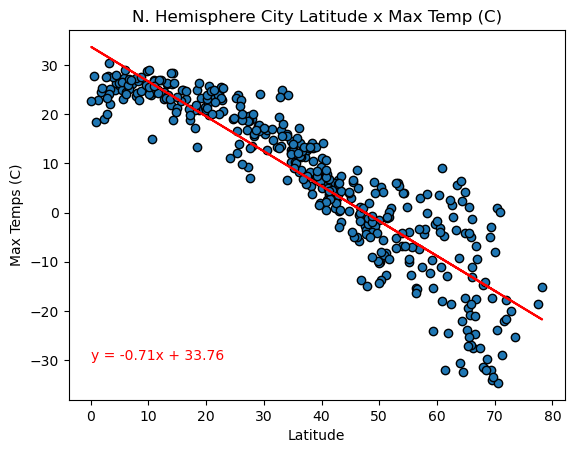

The r-value is: -0.9036621745718294


In [199]:
northern_xval = northern_hemi_df["Lat"]
n_temp_yval = northern_hemi_df["Max Temp"]
plt.scatter(northern_xval,n_temp_yval,edgecolors='k')

temp_regressionvalues = northern_hemi_df["Lat"]*temp_slope+temp_intercept

temp_lineEQ = f"y = {temp_slope:.2f}x + {temp_intercept:.2f}"
print(temp_lineEQ)

plt.plot(northern_hemi_df["Lat"],temp_regressionvalues, "r-")
plt.annotate(temp_lineEQ,(0,-30),color='red')
plt.title("N. Hemisphere City Latitude x Max Temp (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
plt.show()
print(f"The r-value is: {temp_rvalue}")

y = 0.18x + 27.26


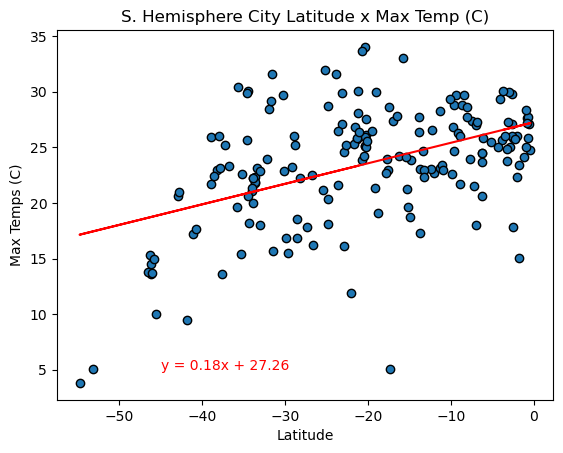

The r-value is: 0.47142796748458926


In [196]:
# Linear regression on Southern Hemisphere
southern_xval = southern_hemi_df["Lat"]
s_temp_yval = southern_hemi_df["Max Temp"]
plt.scatter(southern_xval,s_temp_yval,edgecolors='k')

s_temp_regressionvalues = southern_hemi_df["Lat"]*s_temp_slope+s_temp_intercept

s_temp_lineEQ = f"y = {s_temp_slope:.2f}x + {s_temp_intercept:.2f}"
print(s_temp_lineEQ)

plt.plot(southern_hemi_df["Lat"],s_temp_regressionvalues, "r-")
plt.annotate(s_temp_lineEQ,(-45,5),color='red')
plt.title("S. Hemisphere City Latitude x Max Temp (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
plt.show()

print(f"The r-value is: {s_temp_rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Humidity vs. Latitude 